# Lung Cancer data analysis
#### On a data of 890000 patient admited 

#### Import important libraries

In [7]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

Import data file

In [4]:
df = pd.read_csv('lung_cancer_mortality_data_medium.csv')
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [5]:
df.columns

Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type',
       'end_treatment_date', 'survived'],
      dtype='object')

Check Null Values in data

In [89]:
df.isnull().sum()

id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64

In [6]:
df.describe()

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,445000.500000,55.007008,30.494172,233.633916,0.750024,0.469740,0.225956,0.088157,0.220229
std,256921.014127,9.994485,8.368539,43.432278,0.432999,0.499084,0.418211,0.283524,0.414401
min,1.000000,4.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222500.750000,48.000000,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,445000.500000,55.000000,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,667500.250000,62.000000,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,890000.000000,104.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Insights : 
 1. Average age of a cancer patient is 55 years

 2. Average bmi of a cancer patient is 30.5 which indicate that average patient is Obese 
            
 3. Average Survival rate is 22% which shows in 100 patients there were  only 22 patients who survived from lung cancer

Task : Gender based analysis

In [91]:
df.groupby('gender').count()['id']

gender
Female    444866
Male      445134
Name: id, dtype: int64

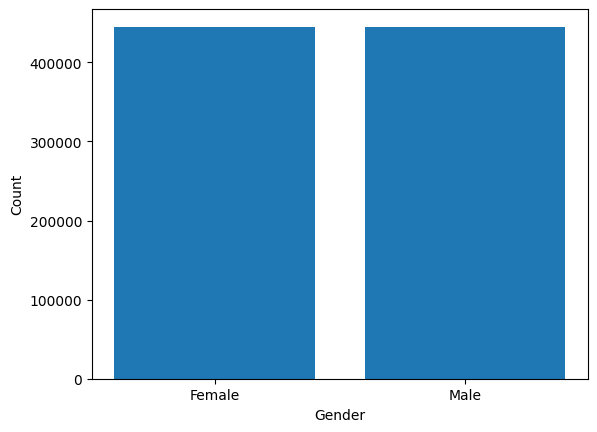

In [92]:
x=df.groupby('gender').count()['id']
plt.bar(['Female','Male'],x)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Insights :  There were almost same number of Male and Female patients admitted for lung cancer

In [93]:
df.groupby(['survived','gender']).count()['id']

survived  gender
0         Female    347034
          Male      346962
1         Female     97832
          Male       98172
Name: id, dtype: int64

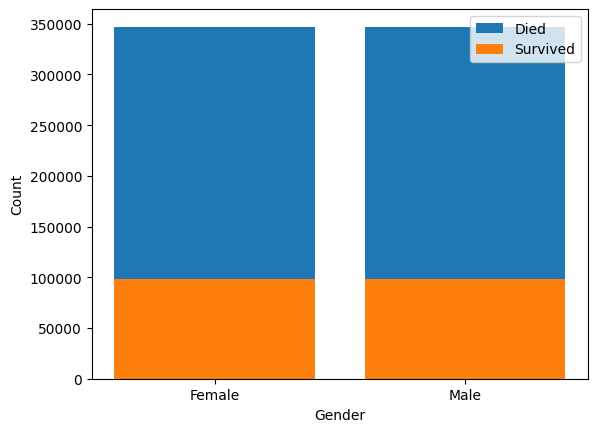

In [113]:
x=df[df['survived']==0].groupby('gender').count()['id']
y=df[df['survived']==1].groupby('gender').count()['id']
plt.bar(['Female','Male'],x,label='Died')
plt.bar(['Female','Male'],y,label='Survived')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend()
plt.show()

Insights : Both Male and Female have almost the same mortality rate

Question : What is the average Treatment time for a patient diagnosed with lung cancer?

In [114]:
#Making the dates in the correct format 
df["diagnosis_date"] = pd.to_datetime(df["diagnosis_date"])
df["end_treatment_date"] = pd.to_datetime(df["end_treatment_date"])

In [ ]:
df['treatment_duration']=df['end_treatment_date']-df['diagnosis_date']
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,treatment_duration
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0,523 days
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1,424 days
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0,370 days
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0,443 days
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0,406 days


In [ ]:
df['treatment_duration'].mean()

Timedelta('458 days 02:05:31.458876408')

Insights : The average treatment time for a patient is 458 days ,approx. 1 year 3 months

Question : Which country has more patients diagnosed with lung cancer and which has more mortality because of lung cancer?

In [125]:
x=df.groupby('country').count()['id']
x

country
Austria           32832
Belgium           32986
Bulgaria          32559
Croatia           33138
Cyprus            32719
Czech Republic    32885
Denmark           33024
Estonia           32893
Finland           32798
France            33199
Germany           32940
Greece            33052
Hungary           32981
Ireland           33243
Italy             32948
Latvia            32565
Lithuania         32856
Luxembourg        32794
Malta             33367
Netherlands       33040
Poland            32949
Portugal          33208
Romania           32963
Slovakia          32853
Slovenia          33005
Spain             33042
Sweden            33161
Name: id, dtype: int64

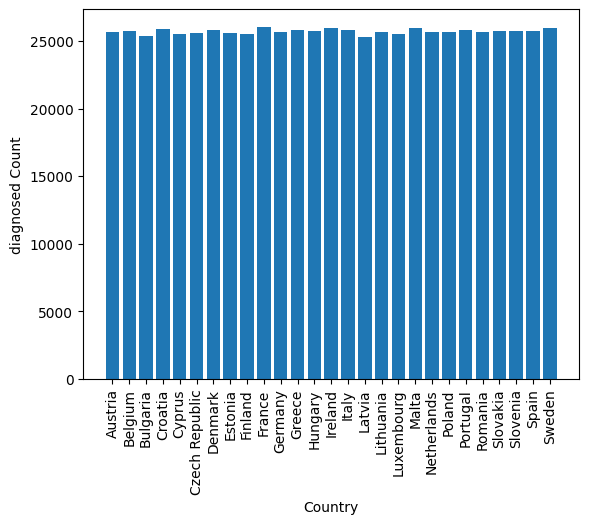

In [133]:
country = [country for country,df in df.groupby('country')]

plt.bar(country,x)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('diagnosed Count')
plt.show()

Insights : Almost all countries have same number of diagnosed lung cancer cases

In [129]:
x=df[df['survived']==0].groupby('country').count()['id']
x

country
Austria           25679
Belgium           25743
Bulgaria          25384
Croatia           25851
Cyprus            25508
Czech Republic    25554
Denmark           25778
Estonia           25554
Finland           25502
France            26036
Germany           25660
Greece            25797
Hungary           25729
Ireland           25962
Italy             25815
Latvia            25319
Lithuania         25661
Luxembourg        25510
Malta             25941
Netherlands       25685
Poland            25666
Portugal          25836
Romania           25645
Slovakia          25712
Slovenia          25730
Spain             25743
Sweden            25996
Name: id, dtype: int64

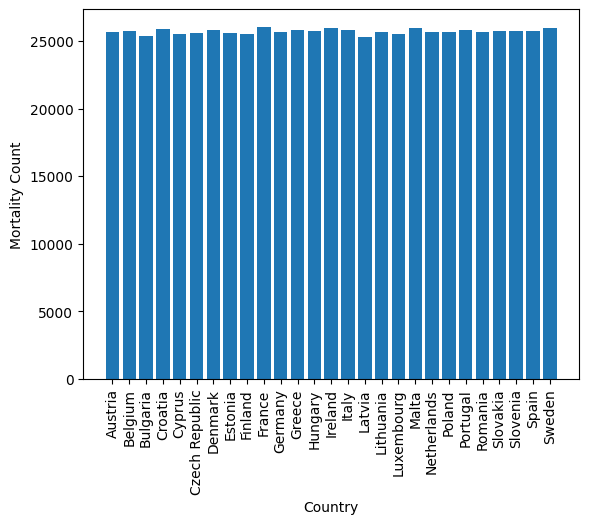

In [132]:
country = [country for country,df in df.groupby('country')]

plt.bar(country,x)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Mortality Count')
plt.show()

Insights: France has the highest mortalities

Task :  find out relation between smoking and survival chances in lung cancer

In [147]:
x=df[df['survived']==1].groupby(['smoking_status']).count()['id'].sort_values(ascending=False)
x

smoking_status
Never Smoked      49208
Passive Smoker    49103
Current Smoker    48893
Former Smoker     48800
Name: id, dtype: int64

Insights :  There is a direct relation between smoking habit and mortality due to lung cancer ,the patient who smokes less has higher chances of survival.

Question : Is there a relation between family history and lung cancer cases?

In [149]:
df.groupby(['family_history','survived']).count()['id']

family_history  survived
No              0           347383
                1            97798
Yes             0           346613
                1            98206
Name: id, dtype: int64